# SpaRTaNS Tutorial: Double Chamber Flow
#### Last updated: 04/30/2022

## Material Properties

#### Source Code

In [1]:
projectionOperator[vector_]:=IdentityMatrix[Length[vector]]-KroneckerProduct[vector,vector]

meanLifetime[sMC_]:=Mean[1/divideByZeroGivesZero[Diagonal[sMC]]]
divideByZeroGivesZero=Chop[#]/. 0|0. ->\[Infinity]&;
numberOfStates=48;

In [9]:
Clear[isotropicScatteringMatricesSymmetric2D]
isotropicScatteringMatricesSymmetric2D[n_] := 
Block[{angles, velocityProjection, normalizedEnergy, 
   energyProjection, kpts, vels, sm, smVelocityRelaxed,smVelocityProjected},
  
  kpts = N[AngleVector /@ Most[Subdivide[\[Pi]/n, 2 \[Pi] + \[Pi]/n, n]]];
  vels = N[AngleVector /@ Most[Subdivide[\[Pi]/n, 2 \[Pi] + \[Pi]/n, n]]];
  
  velocityProjection = Dot @@ projectionOperator /@ 
     Orthogonalize[Prepend[Transpose[vels], ConstantArray[1, n]], Method -> "GramSchmidt"];
  normalizedEnergy = ConstantArray[1/Sqrt[n], n];
  energyProjection = projectionOperator[normalizedEnergy];
  
  sm = Normal[SparseArray[{i_, i_} :> n - 1., {n, n}, -1.]/n];
  
  smVelocityRelaxed = energyProjection.DiagonalMatrix[Diagonal[sm]].energyProjection;
  smVelocityProjected = velocityProjection.sm.velocityProjection;
  
  {kpts, vels, sm, smVelocityProjected, smVelocityRelaxed}
  ]

scaledIsotropicScatteringMatrix2D[m_][{\[Tau]MC_, \[Infinity]}] := 
 Block[{kpts, vels, numeric, sMC, sMR, \[Beta], \[Alpha]},
  {kpts, vels, numeric, sMC, sMR} = isotropicScatteringMatricesSymmetric2D[m];
  \[Alpha] = 1/\[Tau]MC  meanLifetime[sMC];
  {kpts, vels, numeric, sMC, sMR, \[Alpha] sMC}
  ]

#### Material Properties

- We will consider a 2D isotropic material (SO2)
  - Using a 48 states discretization
- We will consider a material in the "Hydrodynamic" Regime
  - $l_{\mathrm{MC}}/W \approx 0.2$
  - $l_{\mathrm{MR}}/W \rightarrow \infty$
- The group velocities and scattering matrix are plotted below

-Graphics-   Legended[-Graphics-, Placed[-Image-, After, Identity]]
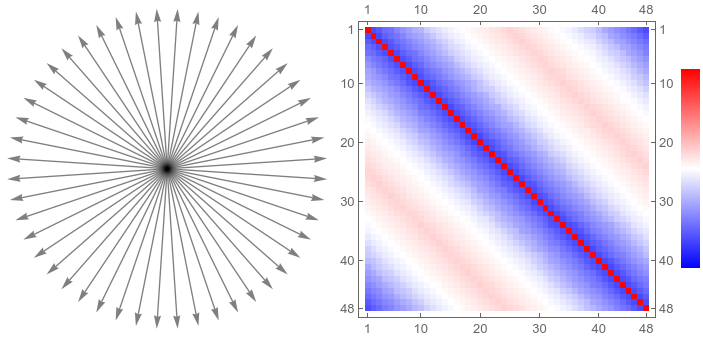

In [12]:
{kpts["SO2"],vels["SO2"],numeric["SO2"],smMomentumConserving["SO2"],smMomentumRelaxing["SO2"],sm["SO2"]}=scaledIsotropicScatteringMatrix2D[numberOfStates][{100,\[Infinity]}];

With[{cf=(Blend[{Blue,White,Red},#]&)},
Multicolumn[{Graphics[{{Opacity[0.5],Arrow[{{0,0},#}]&/@vels["SO2"]}},ImageSize->250],
MatrixPlot[sm["SO2"],PlotLegends->LinearGradientImage[{Bottom,Top}->cf,{30,300}],ImageSize->250,ColorFunction->cf]
},2]]

- We split the scattering matrix into diagonal and mixing-matrix components

In [14]:
diagonal["SO2"] = Diagonal[sm["SO2"]];
mixingMatrix["SO2"] = sm["SO2"] - DiagonalMatrix[diagonal["SO2"]];

- Since all states are on the Fermi surface, we set the energies to the same value of 1 

In [16]:
frequencies["SO2"] = ConstantArray[1., numberOfStates];

- Finally, we pad the 2D velocities with zeros for the out-of-plane direction

In [17]:
velocities["SO2"] = ArrayPad[vels["SO2"], {{0, 0}, {0, 1}}] // N;